# 4. Image proceesing 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform
from mpl_toolkits.mplot3d import axes3d

In [2]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['font.size'] = 18

In [25]:
a = np.random.rand(4,5)
a.shape

(4, 5)

In [26]:
a.shape[0] * a.shape[1]

20

In [27]:
np.reshape(a, a.shape[0] * a.shape[1])

array([0.45014104, 0.75577777, 0.07349393, 0.30122617, 0.83848189,
       0.84473173, 0.85593978, 0.10800381, 0.26842481, 0.9132148 ,
       0.59459357, 0.66571227, 0.19789778, 0.37000594, 0.46853731,
       0.74391732, 0.568798  , 0.4959518 , 0.14355792, 0.68661211])

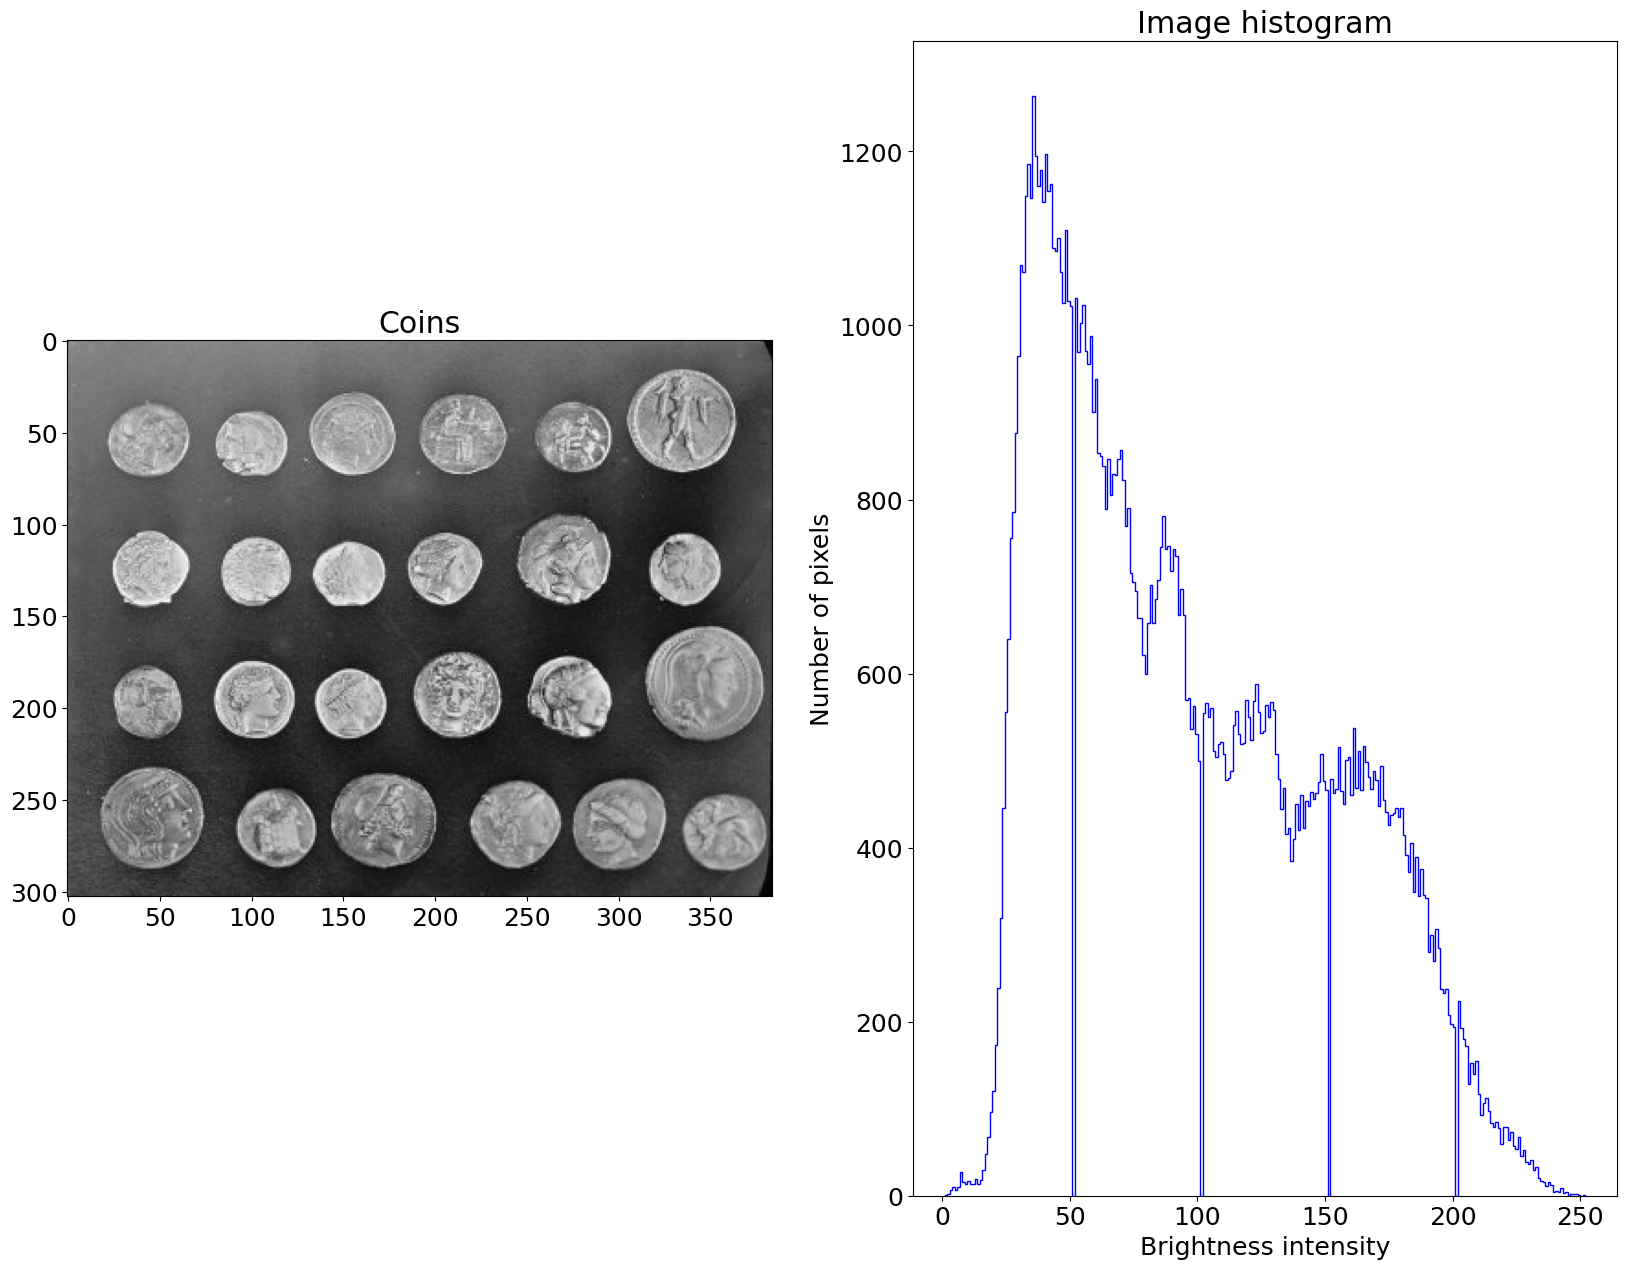

In [41]:
image = data.coins()

plt.figure(figsize=(20, 15))
ax1=plt.subplot(121)
ax1.imshow(image,cmap='gray')
ax1.set_title("Coins")
ax2 = plt.subplot(1,2,2)
ax2.set_title("Image histogram")
ax2.set_xlabel("Brightness intensity")
ax2.set_ylabel("Number of pixels")
raveled_image = image.ravel()


reshaped_image = np.reshape(image,(image.shape[0]*image.shape[1],))


pt1 = ax2.hist(image.ravel(), bins=256, histtype='step', color='blue');

In [38]:
a.ravel()

array([0.45014104, 0.75577777, 0.07349393, 0.30122617, 0.83848189,
       0.84473173, 0.85593978, 0.10800381, 0.26842481, 0.9132148 ,
       0.59459357, 0.66571227, 0.19789778, 0.37000594, 0.46853731,
       0.74391732, 0.568798  , 0.4959518 , 0.14355792, 0.68661211])

a

In [33]:
image.shape

(303, 384)

In [133]:
reshaped_image.shape

(116352,)

In [128]:
a = np.array([[1,2,2,1,5],[6,7,3,4,4]])
a

array([[1, 2, 2, 1, 5],
       [6, 7, 3, 4, 4]])

In [134]:
a.ravel().shape

(10,)

In [113]:
a = np.array([1,2,2,1,5,6,7,3,4,4])


premenna = np.array(np.unique(image,return_counts=True))



cnt = premenna[1].max()
cnt

1264

In [114]:
b = np.where(premenna[1]==cnt)
premenna[0,int(b[0])]

36

In [115]:
print(type(np.unique(image,return_counts=True)))
print(type(np.array(np.unique(image,return_counts=True))))

<class 'tuple'>
<class 'numpy.ndarray'>


In [117]:
np.unique(a,return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]), array([2, 2, 1, 2, 1, 1, 1]))

In [111]:
premenna

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [91]:
image.max()

252

In [93]:
image.index(np.unique(image,return_counts=True)[1].max())

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [85]:
np.where(np.unique(image,return_counts=True))

(array([35]),)

In [52]:
np.unique(image,return_counts=True)[0][35]

36

Histogram definujeme ako zoradené (0-255) početnosti výskytu funkčnej hodnoty šedotonového obrázka.
Na obrázok aplikujeme funkcie na zvýraznenie kontrastu a zobrazíme si jednolive histogramy.

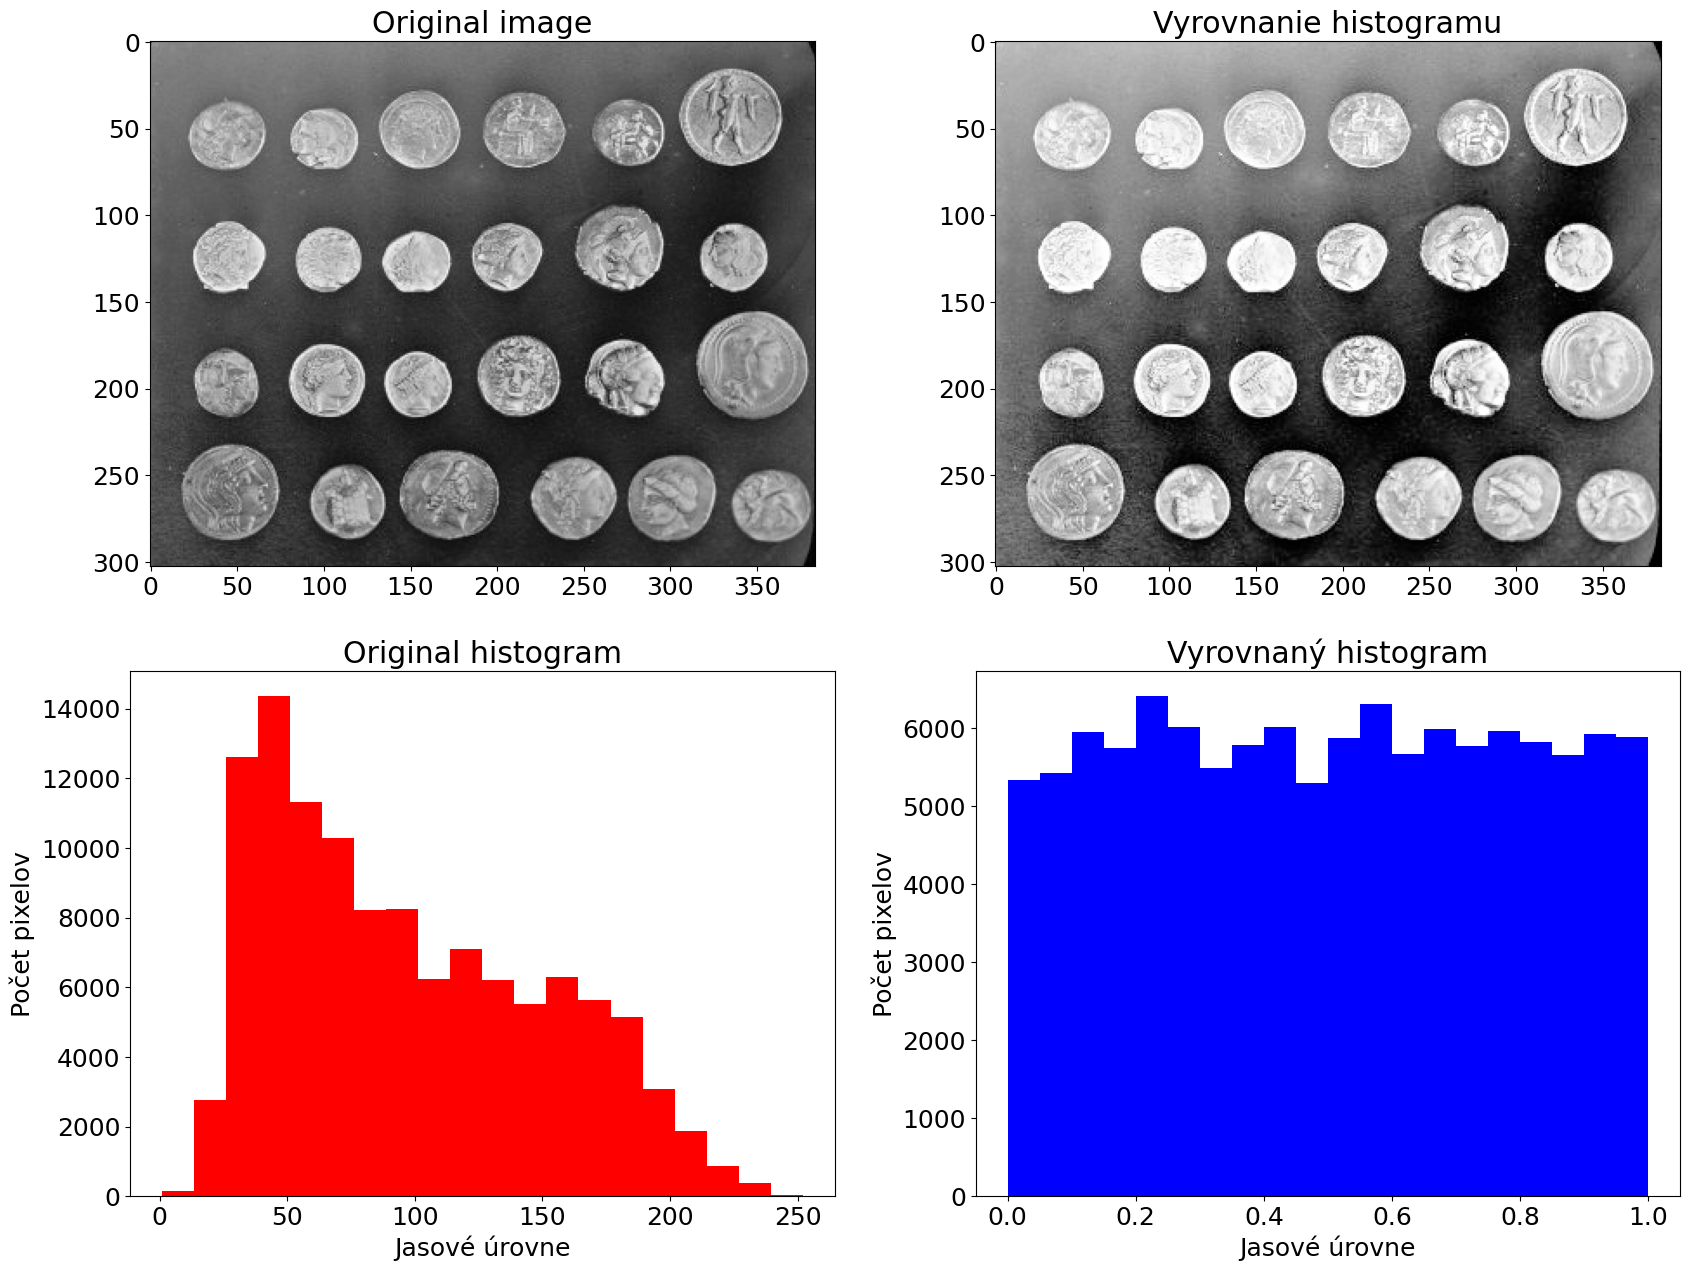

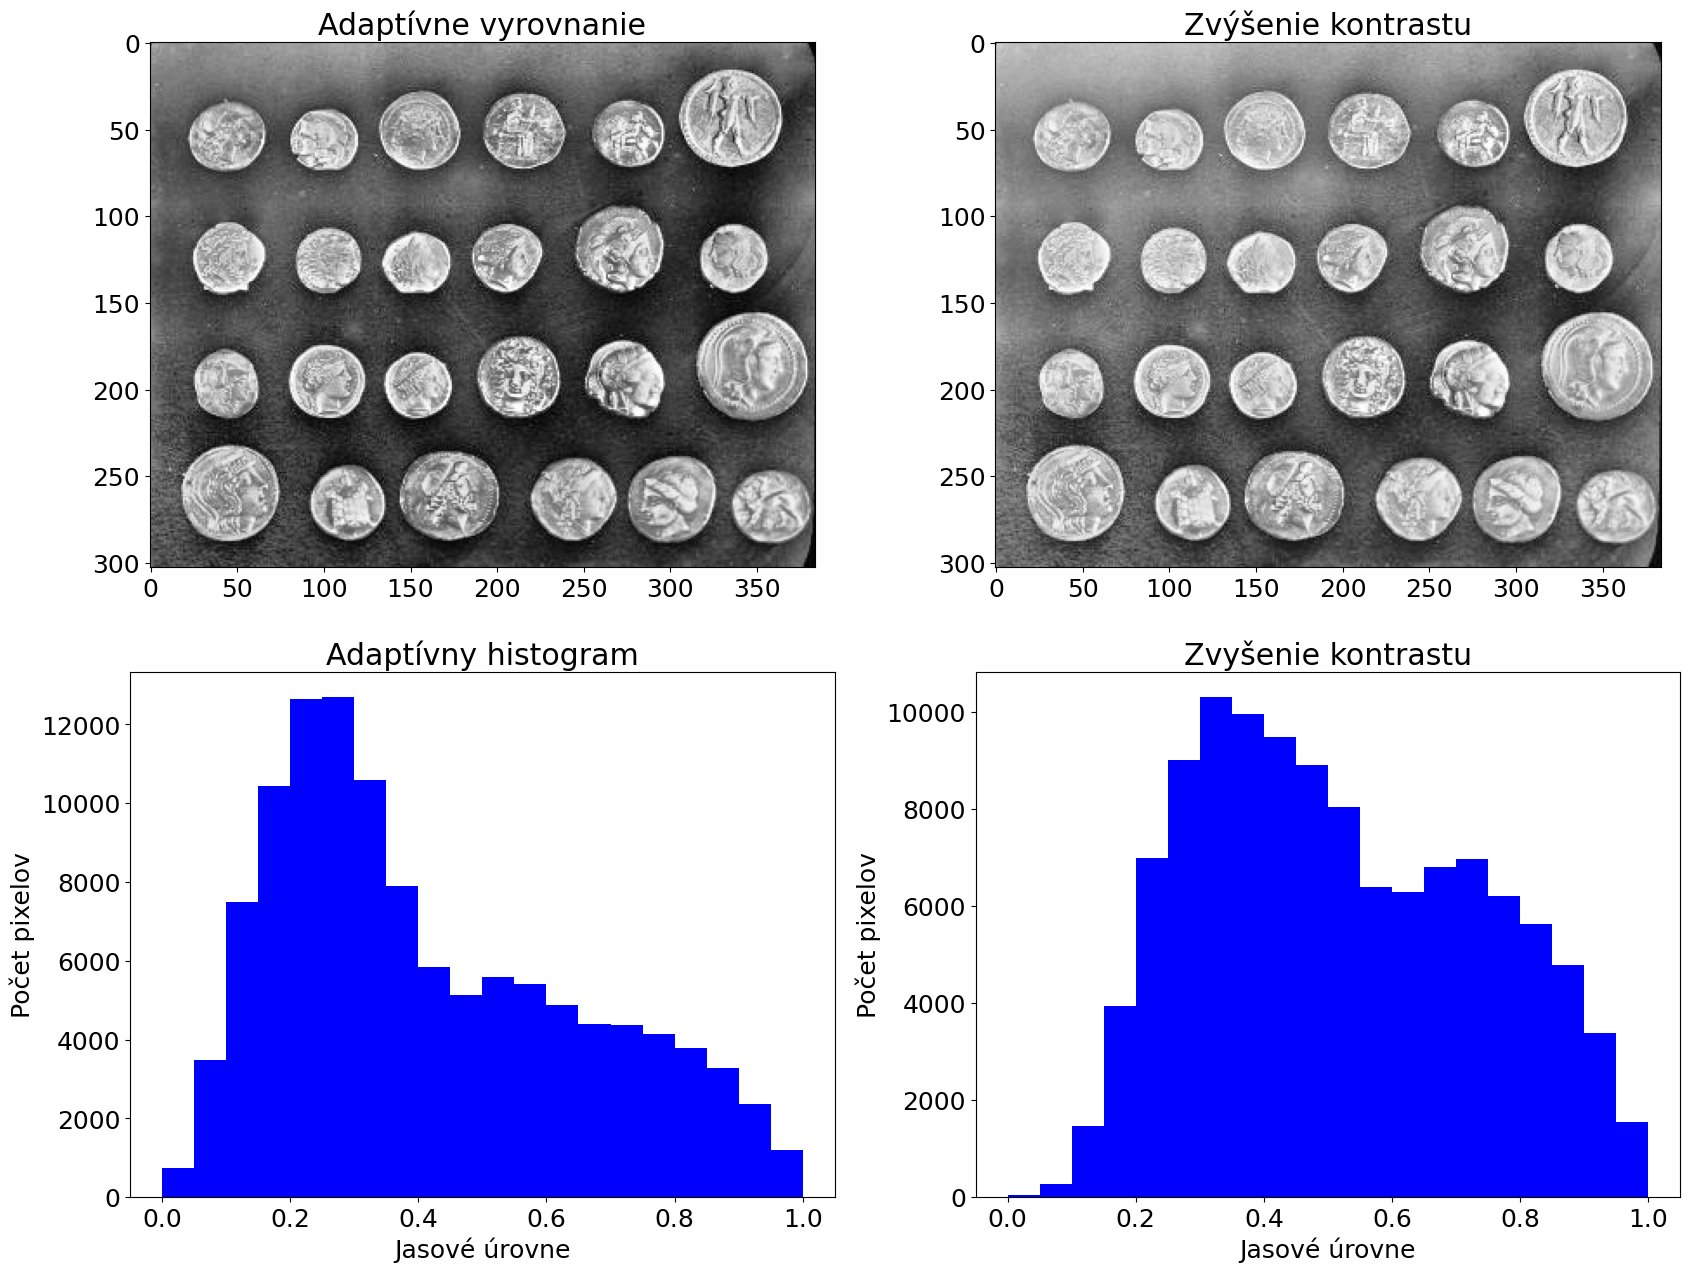

In [42]:
fig, axes = plt.subplots(2,2,figsize=(20, 15))

axes[0,0].imshow(image,cmap='gray')
axes[0,0].set_title("Original image")
axes[1,0].hist(image.ravel(), bins=20, histtype='bar', color='red')
axes[1,0].set_title("Original histogram")
axes[1,0].set_xlabel("Jasové úrovne")
axes[1,0].set_ylabel("Počet pixelov")


img_eq = exposure.equalize_hist(image)

axes[0,1].imshow(img_eq,cmap='gray')
axes[0,1].set_title("Vyrovnanie histogramu")
axes[1,1].hist(img_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[1,1].set_title("Vyrovnaný histogram")
axes[1,1].set_xlabel("Jasové úrovne")
axes[1,1].set_ylabel("Počet pixelov")

fig, axes = plt.subplots(2,2,figsize=(20, 15))

img_adapt_eq = exposure.equalize_adapthist(image)
axes[0,0].imshow(img_adapt_eq,cmap='gray')
axes[0,0].set_title("Adaptívne vyrovnanie")
axes[1,0].hist(img_adapt_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[1,0].set_title("Adaptívny histogram")
axes[1,0].set_xlabel("Jasové úrovne")
axes[1,0].set_ylabel("Počet pixelov")

img_contrast_enhanced = exposure.equalize_adapthist(exposure.adjust_gamma(image, 0.5))
axes[0,1].imshow(img_contrast_enhanced, cmap='gray')
axes[0,1].set_title("Zvýšenie kontrastu")
axes[1,1].hist(img_contrast_enhanced.ravel(), bins=20, histtype='bar', color='blue')
axes[1,1].set_title("Zvyšenie kontrastu")
axes[1,1].set_xlabel("Jasové úrovne")
axes[1,1].set_ylabel("Počet pixelov");


Podobne postupujeme aj s obrázkom mesiaca. A porovnáme si jednotlive funkcie na zmenu kontrastu. Porovnajte si
adaptivne vyrovnanie histogramu.

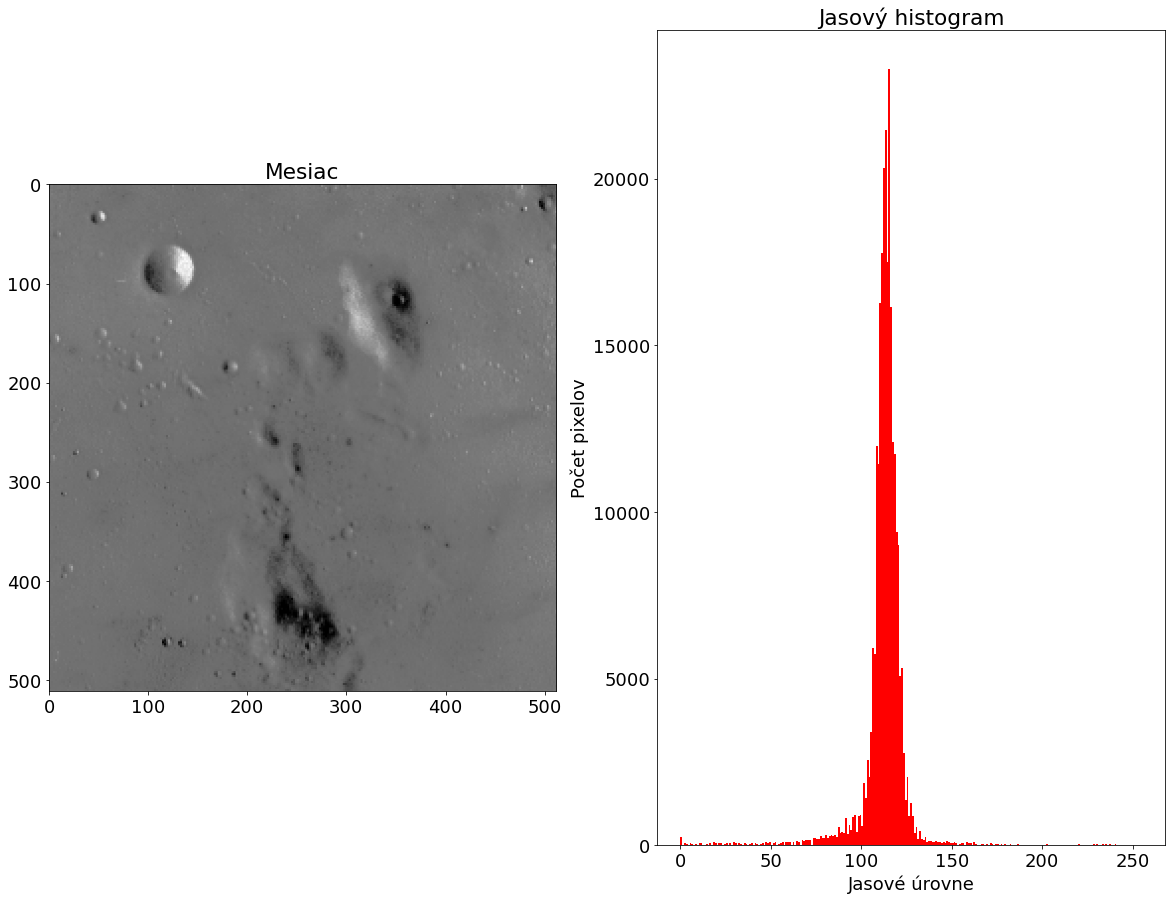

In [51]:
image=data.moon()
plt.figure(figsize=(20, 15))
ax1=plt.subplot(121)
ax1.imshow(image,cmap='gray')
ax1.set_title("Mesiac")
ax2 = plt.subplot(1,2,2)
raveled_image = image.ravel()
pt1 = ax2.hist(np.reshape(image,(image.shape[0]*image.shape[1],)), bins=255, histtype='bar', color='red')
ax2.set_title("Jasový histogram")
ax2.set_xlabel("Jasové úrovne")
ax2.set_ylabel("Počet pixelov");

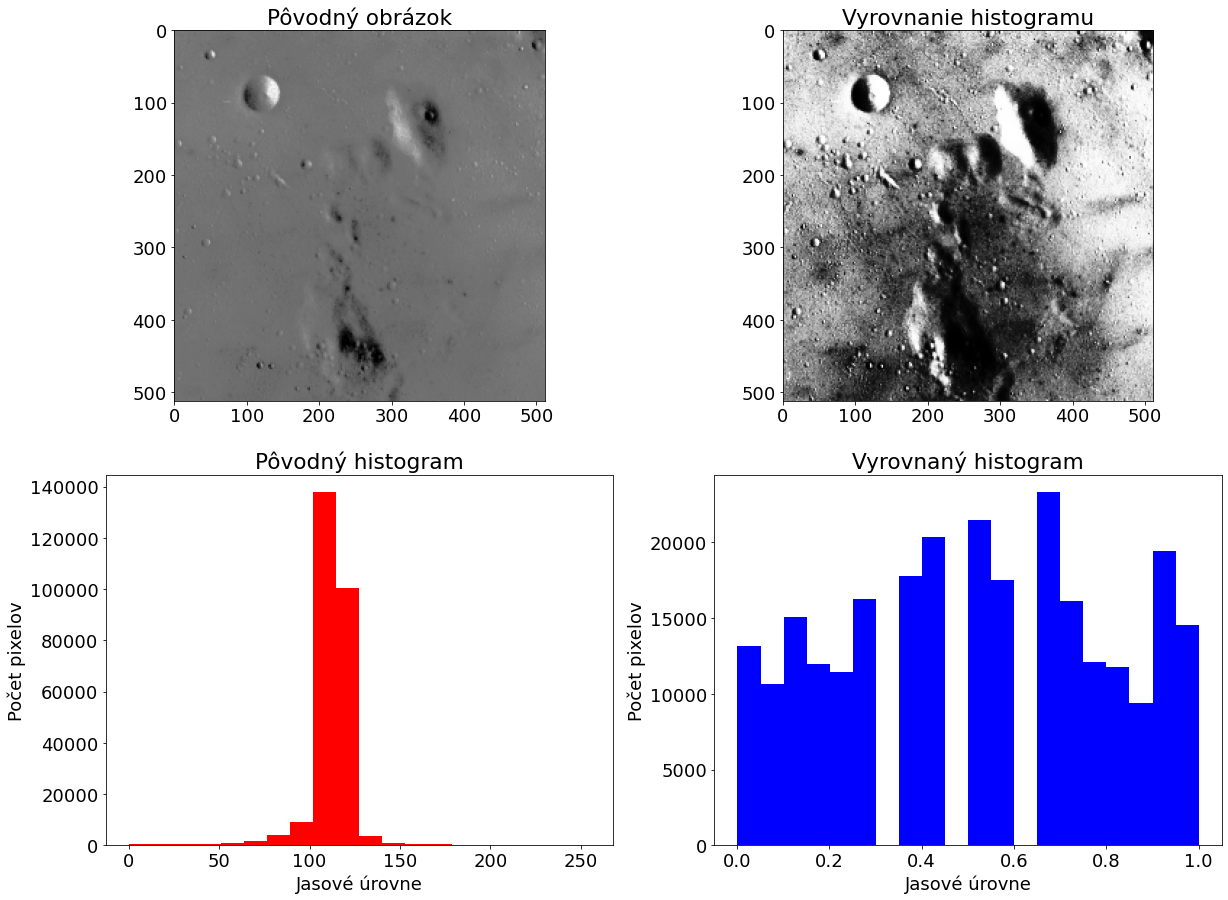

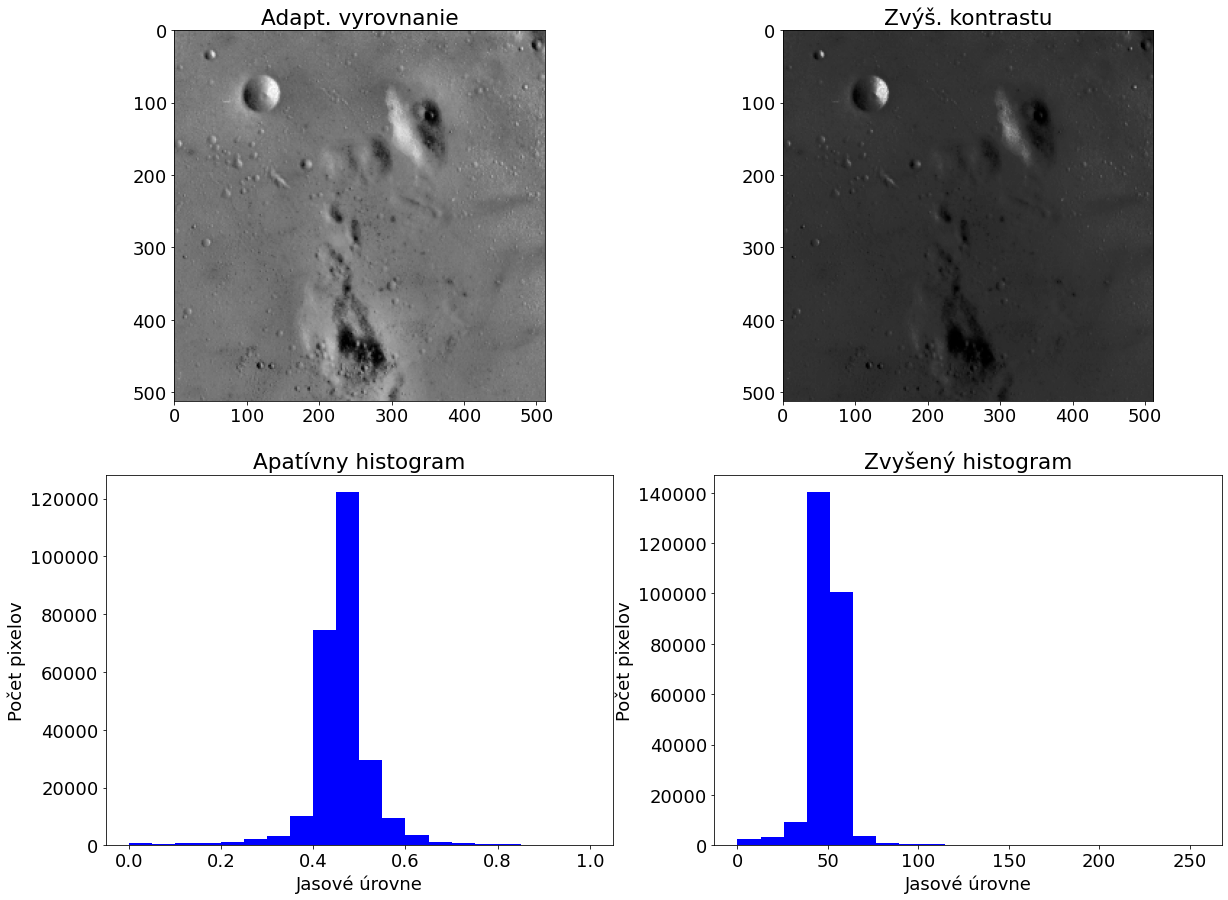

In [52]:
fig, axes = plt.subplots(2,2,figsize=(20, 15))

axes[0,0].imshow(image,cmap='gray')
axes[0,0].set_title("Pôvodný obrázok")
axes[1,0].set_title("Pôvodný histogram")
axes[1,0].set_xlabel("Jasové úrovne")
axes[1,0].set_ylabel("Počet pixelov")
axes[1,0].hist(image.ravel(), bins=20, histtype='bar', color='red')

img_eq = exposure.equalize_hist(image)
axes[0,1].imshow(img_eq,cmap='gray')
axes[1,1].set_title("Vyrovnaný histogram")
axes[1,1].set_xlabel("Jasové úrovne")
axes[1,1].set_ylabel("Počet pixelov")
axes[1,1].hist(img_eq.ravel(), bins=20, histtype='bar', color='blue')
axes[0,1].set_title("Vyrovnanie histogramu")

fig, axes = plt.subplots(2,2,figsize=(20, 15))

img_adapt_eq = exposure.equalize_adapthist(image)
axes[0,0].imshow(img_adapt_eq,cmap='gray')
axes[0,0].set_title("Adapt. vyrovnanie")
axes[1,0].set_title("Apatívny histogram")
axes[1,0].set_xlabel("Jasové úrovne")
axes[1,0].set_ylabel("Počet pixelov")
axes[1,0].hist(img_adapt_eq.ravel(), bins=20, histtype='bar', color='blue')


img_contrast_enhanced = exposure.adjust_gamma(image, 2)
axes[0,1].imshow(img_contrast_enhanced,cmap='gray')
axes[0,1].set_title("Zvýš. kontrastu");
axes[1,1].set_title("Zvyšený histogram")
axes[1,1].set_xlabel("Jasové úrovne")
axes[1,1].set_ylabel("Počet pixelov")
axes[1,1].hist(img_contrast_enhanced.ravel(), bins=20, histtype='bar', color='blue');
